# 🎓 Student Performance Data Analysis

This project is part of my data science internship at Prodigy InfoTech.
Over here I analyze the *Students Performance* dataset to explore patterns in test scores based on gender, parental education, and more.

---

### 🧰 Tools Used:
- Python
- Pandas
- Seaborn
- Matplotlib

### 📌 Goals:
- Understand the structure of the dataset
- Visualize categorical and continuous variables
- Discover trends in student performance


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


In [ ]:
df = pd.read_csv('/content/StudentsPerformance.csv')
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Dataset Overview

The dataset contains 1000 student records with 8 columns.  
Columns include both **categorical** (like gender, race, lunch) and **continuous** (math score, reading score) variables.  
There are no missing values, which makes analysis easier.


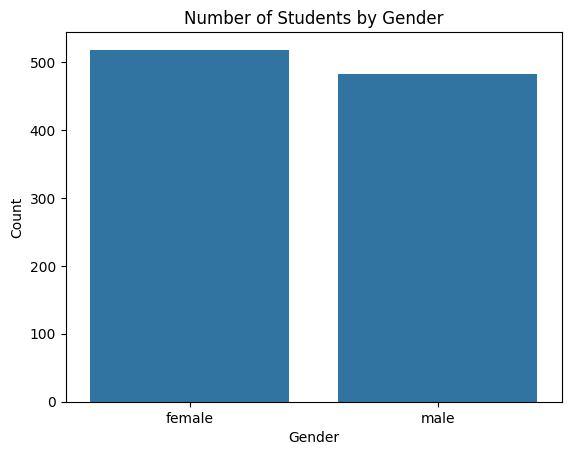

In [ ]:
sns.countplot(x='gender', data=df)
plt.title('Number of Students by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

## Gender Distribution

This bar chart shows the number of male and female students.  
We see there are more female students than male students in this dataset.


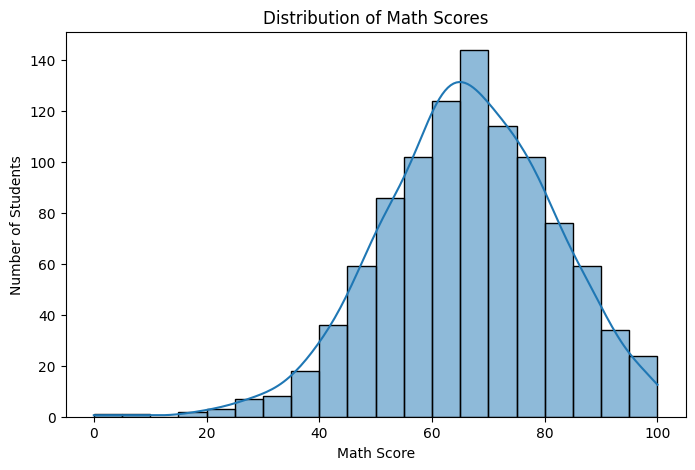

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['math score'], bins=20, kde=True)
plt.title('Distribution of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Number of Students')
plt.show()

## Math Score Distribution

This histogram shows how math scores are spread among students.  
Most students scored between 60 and 90, with a few scoring very low or very high.


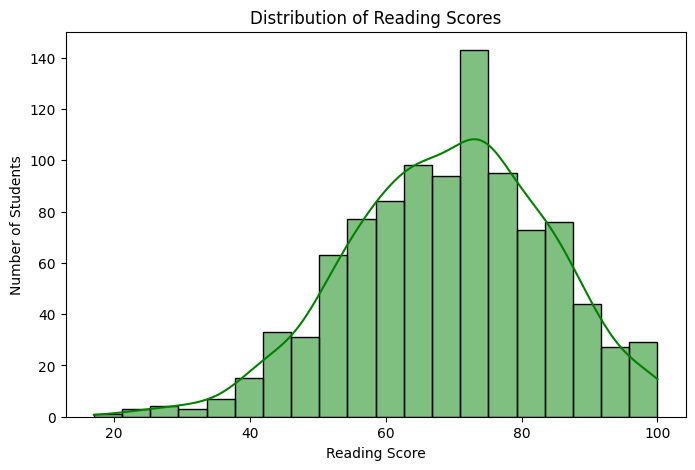

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['reading score'], bins=20, kde=True, color='green')
plt.title('Distribution of Reading Scores')
plt.xlabel('Reading Score')
plt.ylabel('Number of Students')
plt.show()

## Reading Score Distribution

The reading scores mostly cluster around 70 to 100, showing many students have strong reading skills.  
The distribution is slightly skewed towards higher scores.


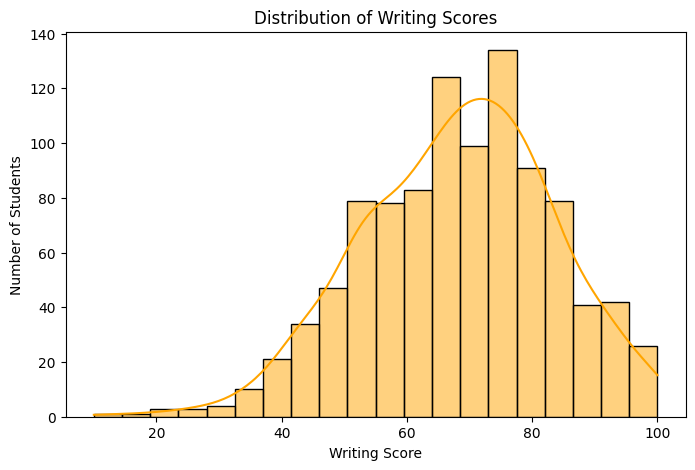

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['writing score'], bins=20, kde=True, color='orange')
plt.title('Distribution of Writing Scores')
plt.xlabel('Writing Score')
plt.ylabel('Number of Students')
plt.show()

## Writing Score Distribution

Most students scored between 60 and 100 in writing, with the distribution skewed slightly towards higher scores.  
This indicates generally strong writing skills in the group.


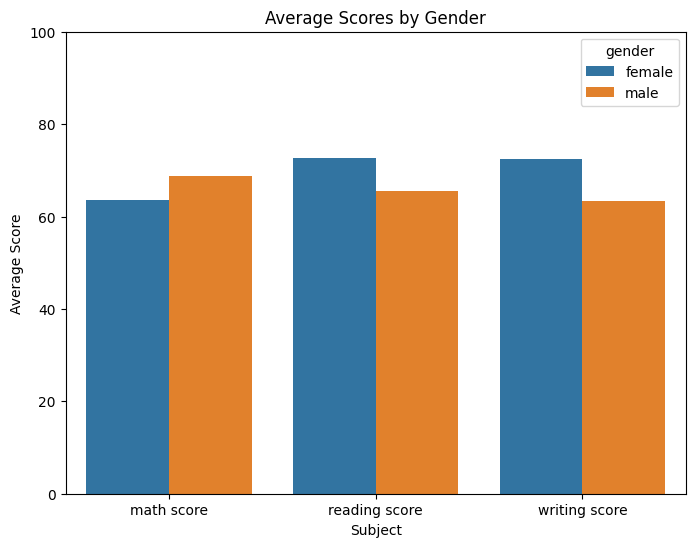

In [ ]:
avg_scores = df.groupby('gender')[['math score', 'reading score', 'writing score']].mean().reset_index()

avg_scores_melted = avg_scores.melt(id_vars='gender', var_name='subject', value_name='average_score')

plt.figure(figsize=(8,6))
sns.barplot(x='subject', y='average_score', hue='gender', data=avg_scores_melted)
plt.title('Average Scores by Gender')
plt.ylabel('Average Score')
plt.xlabel('Subject')
plt.ylim(0, 100)
plt.show()


## Average Scores by Gender

This grouped bar chart shows that female students generally score higher than male students across all three subjects: math, reading, and writing.

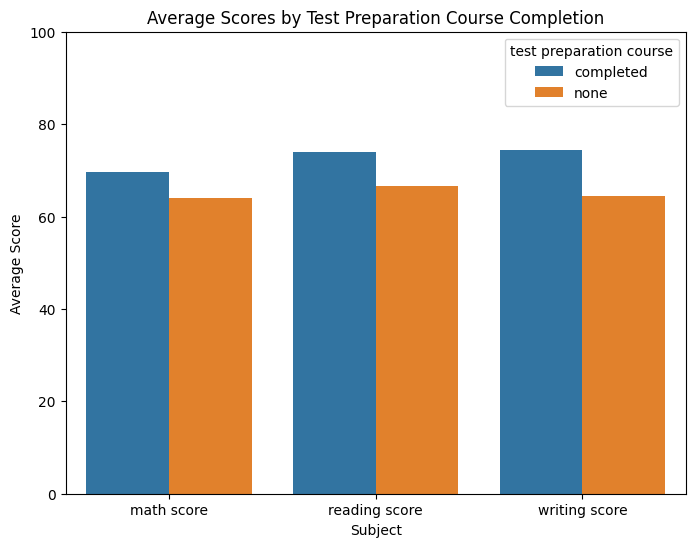

In [ ]:
prep_avg = df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean().reset_index()

prep_avg_melted = prep_avg.melt(id_vars='test preparation course', var_name='subject', value_name='average_score')

plt.figure(figsize=(8,6))
sns.barplot(x='subject', y='average_score', hue='test preparation course', data=prep_avg_melted)
plt.title('Average Scores by Test Preparation Course Completion')
plt.ylabel('Average Score')
plt.xlabel('Subject')
plt.ylim(0, 100)
plt.show()


## Impact of Test Preparation Course

Students who completed the test preparation course tend to have higher average scores across all subjects compared to those who did not.


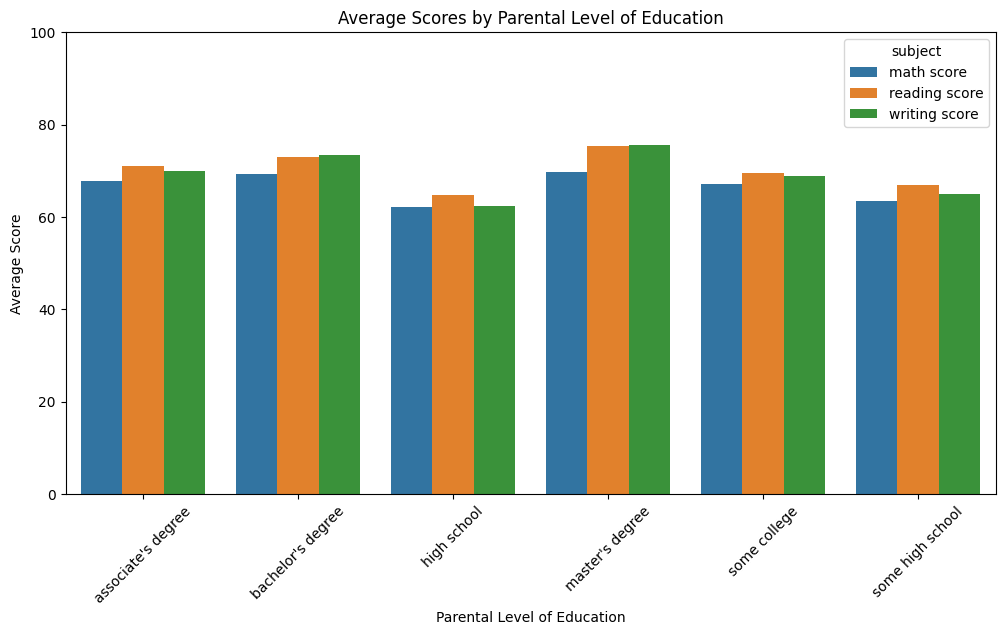

In [ ]:
parent_edu_avg = df.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean().reset_index()

parent_edu_melted = parent_edu_avg.melt(id_vars='parental level of education', var_name='subject', value_name='average_score')

plt.figure(figsize=(12,6))
sns.barplot(x='parental level of education', y='average_score', hue='subject', data=parent_edu_melted)
plt.title('Average Scores by Parental Level of Education')
plt.xlabel('Parental Level of Education')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.show()


## Average Scores by Parental Education

Students with parents who have higher education levels (like master's degree) tend to score higher across subjects.  
This suggests parental education may influence student performance.


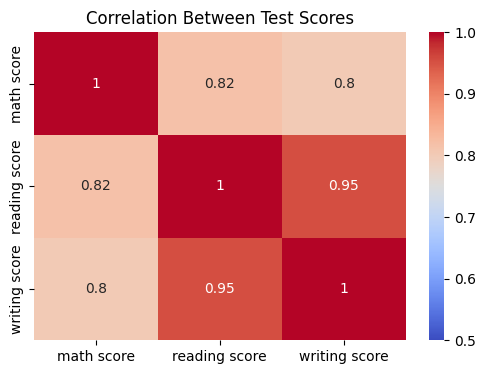

In [ ]:
corr = df[['math score', 'reading score', 'writing score']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=0.5, vmax=1)
plt.title('Correlation Between Test Scores')
plt.show()


# Conclusion

- The dataset contains 1000 student records with a mix of categorical and continuous variables.  
- Female students generally score higher than male students across all subjects.  
- Completing the test preparation course positively impacts average scores.  
- Higher parental education correlates with better student performance.  
- Math, reading, and writing scores are strongly correlated, indicating consistent academic ability across subjects.

This analysis provides useful insights into factors affecting student performance and can guide educators to target support effectively.
